In [153]:
import pandas as pd
import numpy as np
from sklearn import metrics 
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop, Adam
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow import keras
from keras.callbacks import EarlyStopping
import seaborn as sns

In [154]:
data=pd.read_csv("bank.csv")
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [155]:
print(data.info())
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB
None


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [156]:
print(data["deposit"].value_counts())

no     5873
yes    5289
Name: deposit, dtype: int64


In [157]:
le = preprocessing.LabelEncoder()
data['month'] = le.fit_transform(data['month'])
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['loan'] = le.fit_transform(data['loan'])
data['housing'] = le.fit_transform(data['housing'])
data['contact'] = le.fit_transform(data['contact'])
data['poutcome'] = le.fit_transform(data['poutcome'])
data['deposit'] = le.fit_transform(data['deposit'])




data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


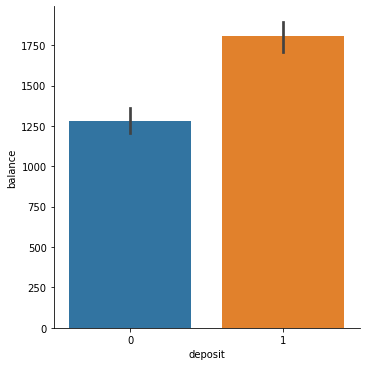

In [158]:
sns.catplot(x="deposit", y="balance",  kind="bar", data=data)

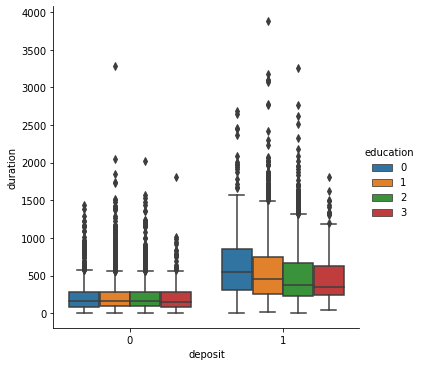

In [159]:
sns.catplot(x="deposit", y="duration", hue="education", kind="box", data=data)

In [160]:
x=data.drop('deposit', axis=1)
y=data['deposit'] 
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25) 

In [161]:
mycallbacks = [EarlyStopping(monitor='val_loss', patience=4)]

In [162]:
model = Sequential([
  Dense(256, activation='sigmoid'),
  Dropout(0.5),
  Dense(384, activation='sigmoid'),
  Dropout(0.5),
  Dense(512, activation='sigmoid'),
  Dropout(0.5),
  Dense(256, activation='sigmoid'),
  Dense(1, activation='sigmoid')
])


In [163]:
model.compile(
    optimizer=Adam(),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [164]:
history = model.fit(x_train, y_train,
                   batch_size= 64,
                    epochs= 30,
                    validation_split=0.2,
                    callbacks=mycallbacks
                    
                    
                   )


Epoch 1/30
105/105 [==============================] - 4s 17ms/step - loss: 0.7154 - accuracy: 0.5309 - val_loss: 0.5357 - val_accuracy: 0.7301
Epoch 2/30
105/105 [==============================] - 1s 13ms/step - loss: 0.5691 - accuracy: 0.7054 - val_loss: 0.5212 - val_accuracy: 0.7487
Epoch 3/30
105/105 [==============================] - 1s 13ms/step - loss: 0.5386 - accuracy: 0.7328 - val_loss: 0.5203 - val_accuracy: 0.7516
Epoch 4/30
105/105 [==============================] - 1s 12ms/step - loss: 0.5312 - accuracy: 0.7432 - val_loss: 0.5167 - val_accuracy: 0.7499
Epoch 5/30
105/105 [==============================] - 1s 13ms/step - loss: 0.5429 - accuracy: 0.7367 - val_loss: 0.5133 - val_accuracy: 0.7540
Epoch 6/30
105/105 [==============================] - 1s 13ms/step - loss: 0.5244 - accuracy: 0.7456 - val_loss: 0.5095 - val_accuracy: 0.7606
Epoch 7/30
105/105 [==============================] - 1s 12ms/step - loss: 0.5246 - accuracy: 0.7516 - val_loss: 0.5053 - val_accuracy: 0.7618

In [165]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])

Test accuracy: 0.7642422318458557


In [166]:
test_logits=model.predict(x_test)
test_logits

array([[0.7609626 ],
       [0.79423016],
       [0.83113074],
       ...,
       [0.23084608],
       [0.1849176 ],
       [0.36793917]], dtype=float32)

In [167]:
y_pred=np.where(test_logits>0.5,1,0)
y_pred

array([[1],
       [1],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [168]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1476
           1       0.78      0.69      0.73      1315

    accuracy                           0.76      2791
   macro avg       0.77      0.76      0.76      2791
weighted avg       0.77      0.76      0.76      2791

